In [31]:
#Importing all the important Packages  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import folium
from folium import plugins
import datetime as dt 
import webbrowser


print('Installation Done')


Installation Done


In [32]:
#filename to be loaded a
filename = "Collisions.csv"

In [33]:
#Loading the file in dataframe
df = pd.read_csv(filename)

In [34]:
#Dataframe details
df.head(15)
df.info

<bound method DataFrame.info of                  X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0      -122.356511  47.517361         1  327920     329420  3856094   
1      -122.361405  47.702064         2   46200      46200  1791736   
2      -122.317414  47.664028         3    1212       1212  3507861   
3      -122.318234  47.619927         4  327909     329409  EA03026   
4      -122.351724  47.560306         5  104900     104900  2671936   
...            ...        ...       ...     ...        ...      ...   
221733 -122.336431  47.689605    221734  321290     322790  E940737   
221734 -122.379619  47.668051    221735  321732     323232  E944454   
221735 -122.312837  47.526850    221736  321607     323107  3752879   
221736 -122.285051  47.567923    221737  321002     322502  E938673   
221737 -122.363032  47.548385    221738  321629     323129  3692985   

           STATUS      ADDRTYPE   INTKEY  \
0         Matched  Intersection  34911.0   
1         Matched         B

In [35]:
#Saving the size of original DF
print("Size  of DF :"+str(df.shape[0])+'x'+str(df.shape[1]))

Size  of DF :221738x40


In [36]:
#data we lose during cleaning.
df_shape_orig = df.shape

In [37]:
#Check where there are NaNs in the dataframe
print(df.isnull().sum(axis=0))

X                    7478
Y                    7478
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3714
INTKEY             149711
LOCATION             4593
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209953
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26451
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11979
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191550
UNDERINFL           26431
WEATHER             26641
ROADCOND            26560
LIGHTCOND           26730
PEDROWNOTGRNT      216543
SDOTCOLNUM          94533
SPEEDING           211802
ST_COLCODE           9413
ST_COLDESC          26451
SEGLANEKEY              0
CROSSWALKKEY

In [38]:
df

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221733,-122.336431,47.689605,221734,321290,322790,E940737,Unmatched,Block,NaN,WALLINGFORD AVE N BETWEEN N 82ND ST AND N 85TH ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
221734,-122.379619,47.668051,221735,321732,323232,E944454,Matched,Block,NaN,BARNES AVE NW BETWEEN 17TH AVE NW AND NW MARKE...,...,Dry,Daylight,NaN,NaN,NaN,71,Same direction -- both turning right -- both m...,0,0,N
221735,-122.312837,47.526850,221736,321607,323107,3752879,Matched,Intersection,35099.0,16TH AVE S AND DALLAS AVE S,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
221736,-122.285051,47.567923,221737,321002,322502,E938673,Matched,Intersection,32686.0,38TH AVE S AND S ANDOVER ST,...,Dry,Daylight,NaN,NaN,Y,10,Entering at angle,0,0,N


In [39]:
df["SEVERITYCODE"].value_counts()

1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

In [40]:
df["ROADCOND"].value_counts()

Dry               128660
Wet                48737
Unknown            15139
Ice                 1232
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

In [41]:
df["SPEEDING"].value_counts()

Y    9936
Name: SPEEDING, dtype: int64

In [42]:
df

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221733,-122.336431,47.689605,221734,321290,322790,E940737,Unmatched,Block,NaN,WALLINGFORD AVE N BETWEEN N 82ND ST AND N 85TH ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
221734,-122.379619,47.668051,221735,321732,323232,E944454,Matched,Block,NaN,BARNES AVE NW BETWEEN 17TH AVE NW AND NW MARKE...,...,Dry,Daylight,NaN,NaN,NaN,71,Same direction -- both turning right -- both m...,0,0,N
221735,-122.312837,47.526850,221736,321607,323107,3752879,Matched,Intersection,35099.0,16TH AVE S AND DALLAS AVE S,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
221736,-122.285051,47.567923,221737,321002,322502,E938673,Matched,Intersection,32686.0,38TH AVE S AND S ANDOVER ST,...,Dry,Daylight,NaN,NaN,Y,10,Entering at angle,0,0,N


In [43]:
if 'OBJECTID' in df:
    del df["OBJECTID"]
if 'COLDETKEY' in df:
    del df["COLDETKEY"]
if 'REPORTNO' in df:
    del df["REPORTNO"]
if 'STATUS' in df:
    del df["STATUS"]
if 'EXCEPTRSNCODE' in df:
    del df["EXCEPTRSNCODE"]
if 'EXCEPTRSNDESC' in df:
    del df["EXCEPTRSNDESC"]
if 'SDOTCOLNUM' in df:
    del df["SDOTCOLNUM"]
if 'STCOLCODE' in df:
    del df["STCOLCODE"]
if 'INTKEY' in df:
    del df["INTKEY"]
if 'LOCATION' in df:
    del df["LOCATION"]
if 'SEVERITYDESC' in df:
    del df["SEVERITYDESC"]
    

In [44]:
#Saving the sixe of original DF
print("Size  of DF :"+str(df.shape[0])+'x'+str(df.shape[1]))

Size  of DF :221738x30


In [45]:
df

,X,Y,INCKEY,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,327920,Intersection,1,Angles,2,0,0,2,...,Clear,Dry,Daylight,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,46200,Block,1,Rear Ended,2,0,0,2,...,Raining,Wet,Dusk,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,1212,Block,2,Head On,2,0,0,2,...,Clear,Dry,Dark - Street Lights On,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,327909,Intersection,2,Pedestrian,3,1,0,1,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,104900,Block,2,Other,2,0,0,1,...,Clear,Ice,Dark - Street Lights On,NaN,Y,50,Fixed object,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221733,-122.336431,47.689605,321290,Block,0,NaN,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
221734,-122.379619,47.668051,321732,Block,1,Sideswipe,2,0,0,2,...,Clear,Dry,Daylight,NaN,NaN,71,Same direction -- both turning right -- both m...,0,0,N
221735,-122.312837,47.526850,321607,Intersection,2,Angles,3,0,0,2,...,Clear,Dry,Daylight,NaN,NaN,10,Entering at angle,0,0,N
221736,-122.285051,47.567923,321002,Intersection,2,Angles,3,0,0,2,...,Clear,Dry,Daylight,NaN,Y,10,Entering at angle,0,0,N


In [46]:
#Data Cleansing
#Find missing WEATHERCOND
todrop1 = df["WEATHER"] == 'Unknown'
noweatherinfo = todrop1.values.sum()

#Find missing ROADCOND
todrop2 = df["ROADCOND"] == "Unknown"
noroadcondinfo = todrop2.values.sum()

#Find missing LIGHTCOND
todrop3 = df["LIGHTCOND"] == "Unknown"
nolightinfo = todrop3.values.sum()


#Find missing LIGHTCOND
todrop4 = df["SEVERITYCODE"] == "2b"
noseveritycode = todrop4.values.sum()

#Collate these and remove
df["TODROP"] = 0
count_noweather = 0
count_noinfo = 0
for i in range(0,len(todrop1)):
    if todrop1[i] == True or todrop2[i] == True or todrop3[i] == True or todrop4[i] == True:
        df["TODROP"][i] = 1
        
print("There are "+str(noweatherinfo)+" accidents with no weather information.")
print("There are "+str(noroadcondinfo)+" accidents with no road condition information.")
print("There are "+str(nolightinfo)+" accidents with no information about light conditions.")
print("There are "+str(df["TODROP"].values.sum())+" accidents without one or more of the above.\n Deleting now...")

#Delete the temporary column "TODROP" and re-index the data
shape0 = df.shape
todrop = df["TODROP"] == 1
df.drop(df.index[todrop], inplace=True)

#Print info about DF shape before and after
print("Shape of DF before: "+str(shape0[0])+" x "+str(shape0[1]))
print("Shape of DF after: "+str(df.shape[0])+" x "+str(df.shape[1]))
print("The original DF had shape: "+str(df_shape_orig[0])+" x "+str(df_shape_orig[1]))

#Re-index dataframe to account for missing rows
df.reset_index(inplace=True)

#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in df:
    del df["TODROP"]
  #  del df["level_0"]
  #  del df["index"]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


There are 15131 accidents with no weather information.
There are 15139 accidents with no road condition information.
There are 13533 accidents with no information about light conditions.
There are 22065 accidents without one or more of the above.
 Deleting now...
Shape of DF before: 221738 x 31
Shape of DF after: 199673 x 31
The original DF had shape: 221738 x 40


In [47]:
#Take columns with mixed boolean data types ([1, "Y", True],[0, "N", False] etc) and cast them as numerical variables
#SPEEDING, INATTENTIONIND, UNDERINFL, PEDROWNOTGRNT, HITPARKEDCAR
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace("Y", 1, inplace=True)

df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)

df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)

df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N', 0, inplace=True)
df["UNDERINFL"].replace('0', 0, inplace=True)
df["UNDERINFL"].replace('1', 1, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)

df["HITPARKEDCAR"].replace("N", 0, inplace=True)
df["HITPARKEDCAR"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace("Y", 1, inplace=True)
df["HITPARKEDCAR"].replace("Y", 1, inplace=True)

In [48]:
def missing_function(df):
    missing_data = df.isnull()
    missing_data.head()

    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print(df[column].value_counts())
        print("")
        
missing_function(df)

index
False    199673
Name: index, dtype: int64
2047      1
130453    1
11695     1
9646      1
13740     1
         ..
23134     1
16989     1
19036     1
31322     1
0         1
Name: index, Length: 199673, dtype: int64

X
False    193618
True       6055
Name: X, dtype: int64
-122.332653    286
-122.344896    271
-122.328079    266
-122.344997    254
-122.299160    243
              ... 
-122.272905      1
-122.347876      1
-122.374516      1
-122.368349      1
-122.411905      1
Name: X, Length: 23803, dtype: int64

Y
False    193618
True       6055
Name: Y, dtype: int64
47.708655    286
47.717173    271
47.604161    266
47.725036    254
47.579673    243
            ... 
47.575087      1
47.702667      1
47.559616      1
47.653813      1
47.690589      1
Name: Y, Length: 23803, dtype: int64

INCKEY
False    199673
Name: INCKEY, dtype: int64
266238    1
73353     1
18082     1
24225     1
22176     1
         ..
316302    1
193419    1
306705    1
168839    1
295445    1
Name: INCKE

In [49]:
df.replace(r'^\s*$', np.nan, regex=True)
df.replace("Unknown", np.nan, inplace = True)
df.replace("Other", np.nan, inplace = True)

#removing columns with more than 20% values missing (INATTENTIONIND,PEDROWNOTGRNT,SPEEDING)
df = df.drop(["INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis=1)

#removing rows for columns with less than 20% values missing (X, Y,COLLISIONTYPE,JUNCTIONTYPE,
                                                            #UNDERINFL,WEATHER,ROADCOND,LIGHTCOND)
df.dropna(subset=["X","Y","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"], 
          axis=0, inplace=True)

#making sure all missing values are handled with
print(df.info())
missing_function(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145724 entries, 0 to 199672
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            145724 non-null  int64  
 1   X                145724 non-null  float64
 2   Y                145724 non-null  float64
 3   INCKEY           145724 non-null  int64  
 4   ADDRTYPE         145724 non-null  object 
 5   SEVERITYCODE     145724 non-null  object 
 6   COLLISIONTYPE    145724 non-null  object 
 7   PERSONCOUNT      145724 non-null  int64  
 8   PEDCOUNT         145724 non-null  int64  
 9   PEDCYLCOUNT      145724 non-null  int64  
 10  VEHCOUNT         145724 non-null  int64  
 11  INJURIES         145724 non-null  int64  
 12  SERIOUSINJURIES  145724 non-null  int64  
 13  FATALITIES       145724 non-null  int64  
 14  INCDATE          145724 non-null  object 
 15  INCDTTM          145724 non-null  object 
 16  JUNCTIONTYPE     145724 non-null  obje

In [50]:
df.head(15)

,index,X,Y,INCKEY,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,0,-122.356511,47.517361,327920,Intersection,1,Angles,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,10,Entering at angle,0,0,0
1,1,-122.361405,47.702064,46200,Block,1,Rear Ended,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Raining,Wet,Dusk,13,From same direction - both going straight - bo...,0,0,0
2,2,-122.317414,47.664028,1212,Block,2,Head On,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Dark - Street Lights On,30,From opposite direction - all others,0,0,0
3,3,-122.318234,47.619927,327909,Intersection,2,Pedestrian,3,1,0,...,MOTOR VEHCILE STRUCK PEDESTRIAN,0,Raining,Wet,Dark - Street Lights On,0,Vehicle going straight hits pedestrian,0,0,0
5,5,-122.333067,47.544302,322205,Block,1,Rear Ended,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Clear,Dry,Daylight,14,From same direction - both going straight - on...,0,0,0
6,6,-122.338543,47.616874,322275,Block,1,Cycles,3,0,1,...,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",0,Overcast,Dry,Daylight,5,Vehicle Strikes Pedalcyclist,0,0,0
8,9,-122.336856,47.655652,20400,Block,1,Rear Ended,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Clear,Wet,Dusk,14,From same direction - both going straight - on...,0,0,0
10,11,-122.385859,47.581191,64700,Block,1,Angles,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,10,Entering at angle,0,0,0
11,12,-122.344896,47.717173,1003,Block,2,Cycles,2,0,1,...,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",0,Clear,Dry,Daylight,45,Vehicle - Pedalcyclist,15057,0,0
13,15,-122.358250,47.732321,63600,Intersection,2,Cycles,2,0,1,...,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0,Clear,Dry,Daylight,45,Vehicle - Pedalcyclist,0,0,0


In [51]:
#Descriptive Stats
descriptive_stats= df.describe(include="all")

In [52]:
print(df.SEVERITYCODE.value_counts())

1    95913
2    49569
3      240
0        2
Name: SEVERITYCODE, dtype: int64


<AxesSubplot:>

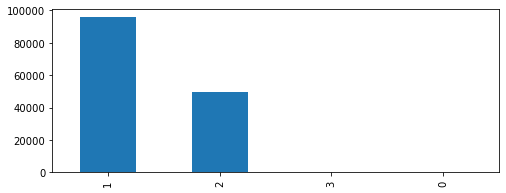

In [53]:
df.SEVERITYCODE.value_counts().plot.bar(figsize=(8,3))


<AxesSubplot:>

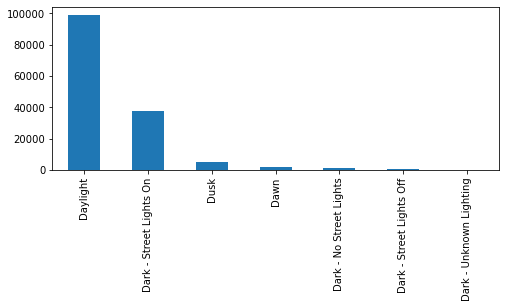

In [54]:
df.LIGHTCOND.value_counts().plot.bar(figsize=(8,3))

<AxesSubplot:>

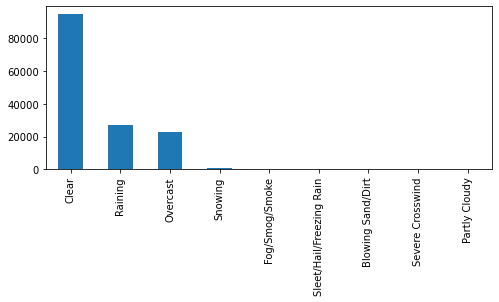

In [55]:
df.WEATHER.value_counts().plot.bar(figsize=(8,3))

In [56]:
print(df.ROADCOND.value_counts())

Dry               105934
Wet                38373
Ice                  687
Snow/Slush           629
Standing Water        50
Sand/Mud/Dirt         30
Oil                   21
Name: ROADCOND, dtype: int64


<AxesSubplot:>

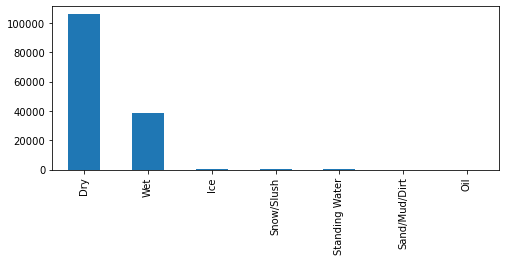

In [57]:
df.ROADCOND.value_counts().plot.bar(figsize=(8,3))

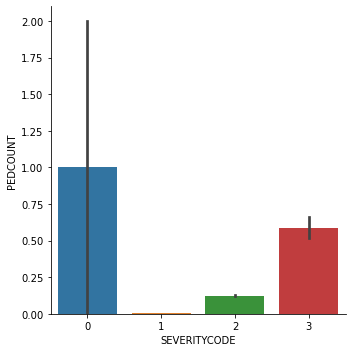

In [58]:
# The number of pedestrians involved in the collision.
import seaborn as sns
sns.catplot(x="SEVERITYCODE", y="PEDCOUNT", data=df, kind="bar")

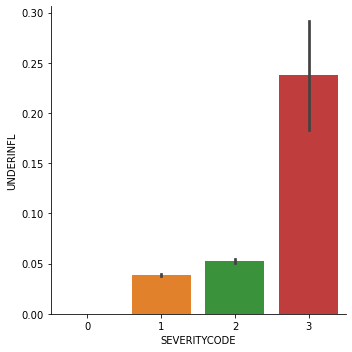

In [59]:
# The number of collision under in the influence.
import seaborn as sns
sns.catplot(x="SEVERITYCODE", y="UNDERINFL", data=df, kind="bar")

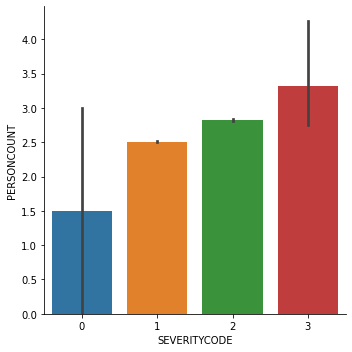

In [60]:
# The number of pedestrians involved in the collision.
import seaborn as sns
sns.catplot(x="SEVERITYCODE", y="PERSONCOUNT", data=df, kind="bar")


<AxesSubplot:xlabel='ADDRTYPE', ylabel='count'>

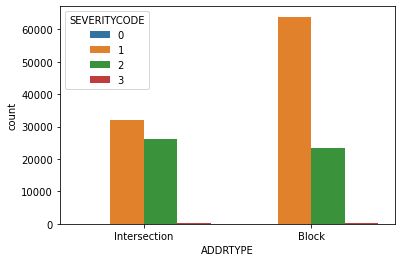

In [61]:
# Count plot for Address type : 
sns.countplot(x='ADDRTYPE', data=df, hue='SEVERITYCODE')

<AxesSubplot:>

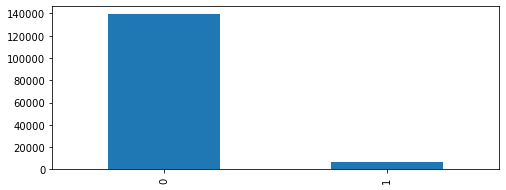

In [62]:
df.UNDERINFL.value_counts().plot.bar(figsize=(8,3))

<AxesSubplot:xlabel='HITPARKEDCAR', ylabel='count'>

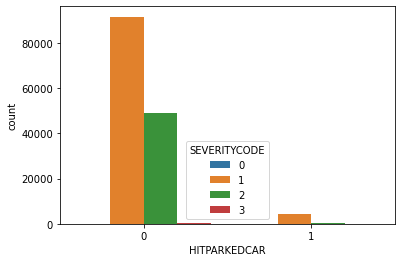

In [63]:
sns.countplot(x='HITPARKEDCAR', data=df, hue='SEVERITYCODE')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145724 entries, 0 to 199672
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            145724 non-null  int64  
 1   X                145724 non-null  float64
 2   Y                145724 non-null  float64
 3   INCKEY           145724 non-null  int64  
 4   ADDRTYPE         145724 non-null  object 
 5   SEVERITYCODE     145724 non-null  object 
 6   COLLISIONTYPE    145724 non-null  object 
 7   PERSONCOUNT      145724 non-null  int64  
 8   PEDCOUNT         145724 non-null  int64  
 9   PEDCYLCOUNT      145724 non-null  int64  
 10  VEHCOUNT         145724 non-null  int64  
 11  INJURIES         145724 non-null  int64  
 12  SERIOUSINJURIES  145724 non-null  int64  
 13  FATALITIES       145724 non-null  int64  
 14  INCDATE          145724 non-null  object 
 15  INCDTTM          145724 non-null  object 
 16  JUNCTIONTYPE     145724 non-null  obje

In [65]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'], format='%Y-%m-%d')
date = df[['SEVERITYCODE', 'INCDATE']]
date

,SEVERITYCODE,INCDATE
0,1,2020-01-19 00:00:00+00:00
1,1,2005-04-11 00:00:00+00:00
2,2,2013-03-31 00:00:00+00:00
3,2,2020-01-06 00:00:00+00:00
5,1,2019-08-08 00:00:00+00:00
...,...,...
199667,2,2019-06-18 00:00:00+00:00
199669,1,2019-07-25 00:00:00+00:00
199670,2,2019-07-24 00:00:00+00:00
199671,2,2019-07-07 00:00:00+00:00


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

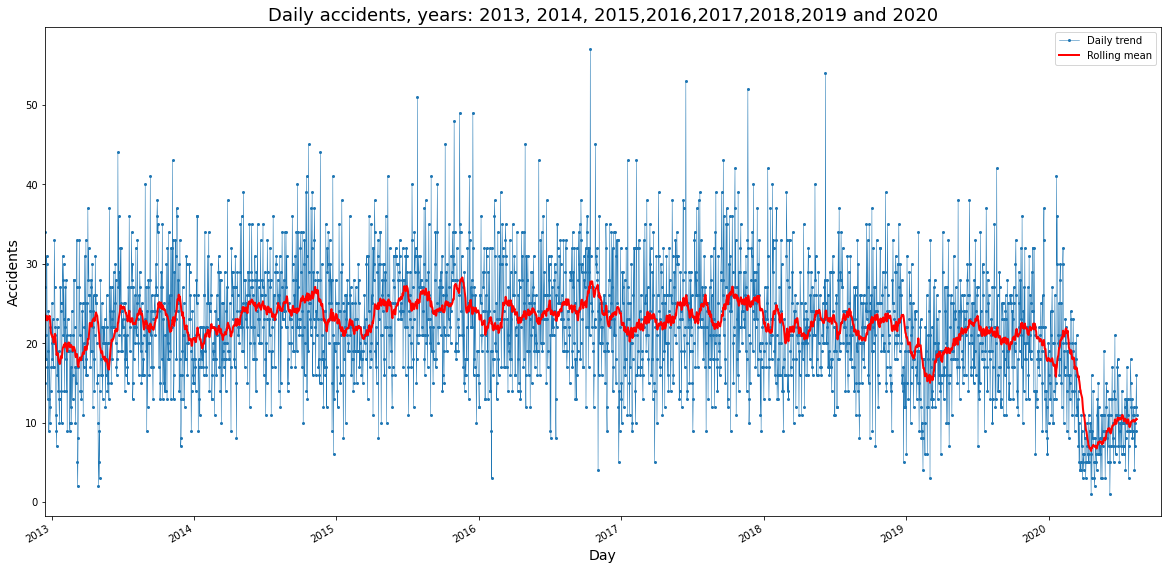

In [66]:
#Daily accidents based on the Year 
date['year'] = df.INCDATE.dt.year
date['month'] = df.INCDATE.dt.month
date['weekday'] = df.INCDATE.dt.weekday
high_sev = date[date['SEVERITYCODE']==1]

season = date[['INCDATE', 'SEVERITYCODE']].groupby('INCDATE').count()
season['rolling'] = season.SEVERITYCODE.rolling(window=30).mean()
season['SEVERITYCODE'][365*8:].plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend')
season['rolling'][365*8:].plot(color='r', linewidth=2, label='Rolling mean')
plt.title('Daily accidents, years: 2013, 2014, 2015,2016,2017,2018,2019 and 2020', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Accidents', size=14)

t0 = dt.datetime.strptime('2012-12-15', '%Y-%m-%d')
t1 = dt.datetime.strptime('2020-10-15', '%Y-%m-%d')

plt.xlim(t0,t1)
plt.legend()
plt.show()

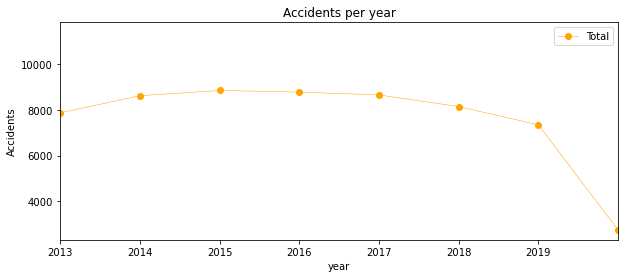

In [67]:
#By year

yearly = date[['year', 'SEVERITYCODE']].groupby('year').count()
yearly['SEVERITYCODE'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='orange', label='Total')
plt.title('Accidents per year')
plt.xticks(range(2012,2020))
plt.xlim(2013,2020)
plt.ylabel('Accidents')
plt.legend()
plt.show()

In [68]:
df

,index,X,Y,INCKEY,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,0,-122.356511,47.517361,327920,Intersection,1,Angles,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,10,Entering at angle,0,0,0
1,1,-122.361405,47.702064,46200,Block,1,Rear Ended,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Raining,Wet,Dusk,13,From same direction - both going straight - bo...,0,0,0
2,2,-122.317414,47.664028,1212,Block,2,Head On,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Dark - Street Lights On,30,From opposite direction - all others,0,0,0
3,3,-122.318234,47.619927,327909,Intersection,2,Pedestrian,3,1,0,...,MOTOR VEHCILE STRUCK PEDESTRIAN,0,Raining,Wet,Dark - Street Lights On,0,Vehicle going straight hits pedestrian,0,0,0
5,5,-122.333067,47.544302,322205,Block,1,Rear Ended,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Clear,Dry,Daylight,14,From same direction - both going straight - on...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199667,221732,-122.334832,47.522784,320342,Block,2,Rear Ended,3,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Clear,Dry,Dark - Street Lights On,14,From same direction - both going straight - on...,0,0,0
199669,221734,-122.379619,47.668051,321732,Block,1,Sideswipe,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,71,Same direction -- both turning right -- both m...,0,0,0
199670,221735,-122.312837,47.526850,321607,Intersection,2,Angles,3,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,10,Entering at angle,0,0,0
199671,221736,-122.285051,47.567923,321002,Intersection,2,Angles,3,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,10,Entering at angle,0,0,0


In [69]:
#df["LOCATION"]=pd.to_float(df["LOCATION"],errors='coerce')
df["INCDATE"]=df["INCDATE"].astype(int)
#df["INCDTTM"]=df["INCDTTM"].astype(int)
#df["SEVERITYDESC"]=pd.to_float(df["SEVERITYDESC"],errors='coerce')
#df["SEVERITYDESC"]=pd.to_float(df["SEVERITYDESC"],errors='coerce')

In [70]:
#feature_stats.iloc[:,3:].apply(pd.to_numeric,errors='coerce')

In [71]:
#np.count_nonzero(feature_df['UNDERINFL'])

In [72]:
    #Light Condition
#lightcondsize = feature_df ["LIGHTCOND"].size

In [73]:
#featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

In [74]:
#lightcond = feature_df['LIGHTCOND']
#lightcond = lightcond.values
#lightcond = lightcond[featureinlightcond]

In [75]:
df

,index,X,Y,INCKEY,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,0,-122.356511,47.517361,327920,Intersection,1,Angles,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,10,Entering at angle,0,0,0
1,1,-122.361405,47.702064,46200,Block,1,Rear Ended,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Raining,Wet,Dusk,13,From same direction - both going straight - bo...,0,0,0
2,2,-122.317414,47.664028,1212,Block,2,Head On,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Dark - Street Lights On,30,From opposite direction - all others,0,0,0
3,3,-122.318234,47.619927,327909,Intersection,2,Pedestrian,3,1,0,...,MOTOR VEHCILE STRUCK PEDESTRIAN,0,Raining,Wet,Dark - Street Lights On,0,Vehicle going straight hits pedestrian,0,0,0
5,5,-122.333067,47.544302,322205,Block,1,Rear Ended,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Clear,Dry,Daylight,14,From same direction - both going straight - on...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199667,221732,-122.334832,47.522784,320342,Block,2,Rear Ended,3,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Clear,Dry,Dark - Street Lights On,14,From same direction - both going straight - on...,0,0,0
199669,221734,-122.379619,47.668051,321732,Block,1,Sideswipe,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,71,Same direction -- both turning right -- both m...,0,0,0
199670,221735,-122.312837,47.526850,321607,Intersection,2,Angles,3,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,10,Entering at angle,0,0,0
199671,221736,-122.285051,47.567923,321002,Intersection,2,Angles,3,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,10,Entering at angle,0,0,0


In [76]:

import random
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation Metrics
import time
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve

In [77]:
df.SEVERITYCODE.value_counts()

1    95913
2    49569
3      240
0        2
Name: SEVERITYCODE, dtype: int64

In [78]:
if 'INCDTTM' in df:
    del df["INCDTTM"]
if 'SDOT_COLDESC' in df:
     del df["SDOT_COLDESC"]
if 'ST_COLDESC' in df:
     del df["ST_COLDESC"]
if 'COLLISIONTYPE' in df:
     del df["COLLISIONTYPE"]


In [79]:
# 1 - Put all severity code 2 class in a separate dataset.
df_scode2 = df.loc[df.SEVERITYCODE == '2']
df_scode2
# 2 - Randomly select 58188 observations from the severity code 1(majority class)
df_scode1 = df.loc[df['SEVERITYCODE'] == '1']
# 3 - Randomly select 58188 observations from the severity code 1(majority class)
df_scode3 = df.loc[df['SEVERITYCODE'] == '3']
# 0 - Randomly select 58188 observations from the severity code 1(majority class)
df_scode0 = df.loc[df['SEVERITYCODE'] == '0']
# 0 - Randomly select 58188 observations from the severity code 1(majority class)
#df_scode4 = df.loc[df['SEVERITYCODE'] == '2b']

# 3 - concatenating datasets to get balanced dataset
df_balanced = pd.concat([df_scode0,df_scode1,df_scode2,df_scode3])
df_balanced


,index,X,Y,INCKEY,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
103608,116815,-122.314165,47.606192,132003,Intersection,0,0,0,0,0,...,At Intersection (intersection related),11.0,0,Raining,Wet,Daylight,10,0,0,0
188468,209960,-122.385357,47.676832,333550,Block,0,3,2,0,1,...,Mid-Block (not related to intersection),11.0,0,Clear,Wet,Daylight,1,0,0,1
0,0,-122.356511,47.517361,327920,Intersection,1,2,0,0,2,...,At Intersection (intersection related),11.0,0,Clear,Dry,Daylight,10,0,0,0
1,1,-122.361405,47.702064,46200,Block,1,2,0,0,2,...,Mid-Block (not related to intersection),14.0,0,Raining,Wet,Dusk,13,0,0,0
5,5,-122.333067,47.544302,322205,Block,1,2,0,0,2,...,Mid-Block (not related to intersection),14.0,0,Clear,Dry,Daylight,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198052,220034,-122.367932,47.521030,320772,Block,3,2,1,0,1,...,Mid-Block (not related to intersection),24.0,1,Overcast,Dry,Daylight,0,0,21846,0
198437,220439,-122.296188,47.578347,320619,Intersection,3,2,0,0,2,...,At Intersection (intersection related),11.0,1,Clear,Dry,Daylight,28,0,0,0
198489,220491,-122.290479,47.683048,320081,Intersection,3,3,0,0,3,...,At Intersection (intersection related),11.0,0,Clear,Dry,Daylight,28,0,0,0
199158,221197,-122.293240,47.560808,322060,Intersection,3,4,1,0,3,...,At Intersection (intersection related),24.0,0,Clear,Dry,Daylight,10,0,0,0


In [80]:
df

,index,X,Y,INCKEY,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,0,-122.356511,47.517361,327920,Intersection,1,2,0,0,2,...,At Intersection (intersection related),11.0,0,Clear,Dry,Daylight,10,0,0,0
1,1,-122.361405,47.702064,46200,Block,1,2,0,0,2,...,Mid-Block (not related to intersection),14.0,0,Raining,Wet,Dusk,13,0,0,0
2,2,-122.317414,47.664028,1212,Block,2,2,0,0,2,...,Mid-Block (not related to intersection),11.0,0,Clear,Dry,Dark - Street Lights On,30,0,0,0
3,3,-122.318234,47.619927,327909,Intersection,2,3,1,0,1,...,At Intersection (intersection related),24.0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0
5,5,-122.333067,47.544302,322205,Block,1,2,0,0,2,...,Mid-Block (not related to intersection),14.0,0,Clear,Dry,Daylight,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199667,221732,-122.334832,47.522784,320342,Block,2,3,0,0,2,...,Mid-Block (but intersection related),14.0,0,Clear,Dry,Dark - Street Lights On,14,0,0,0
199669,221734,-122.379619,47.668051,321732,Block,1,2,0,0,2,...,Mid-Block (not related to intersection),11.0,0,Clear,Dry,Daylight,71,0,0,0
199670,221735,-122.312837,47.526850,321607,Intersection,2,3,0,0,2,...,At Intersection (intersection related),11.0,0,Clear,Dry,Daylight,10,0,0,0
199671,221736,-122.285051,47.567923,321002,Intersection,2,3,0,0,2,...,At Intersection (intersection related),11.0,0,Clear,Dry,Daylight,10,0,0,0


In [81]:

df_balanced = df_balanced.sample(frac=1,random_state=0,replace=False)

#Replacing 0 with N and 1 with Y as this column has mixed datatype values, making it consistent
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['0'],'N')
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['1'],'Y')

#checking if dataset balanced
print(df_balanced.info())
print(df_balanced['SEVERITYCODE'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145724 entries, 178307 to 85157
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            145724 non-null  int64  
 1   X                145724 non-null  float64
 2   Y                145724 non-null  float64
 3   INCKEY           145724 non-null  int64  
 4   ADDRTYPE         145724 non-null  object 
 5   SEVERITYCODE     145724 non-null  object 
 6   PERSONCOUNT      145724 non-null  int64  
 7   PEDCOUNT         145724 non-null  int64  
 8   PEDCYLCOUNT      145724 non-null  int64  
 9   VEHCOUNT         145724 non-null  int64  
 10  INJURIES         145724 non-null  int64  
 11  SERIOUSINJURIES  145724 non-null  int64  
 12  FATALITIES       145724 non-null  int64  
 13  INCDATE          145724 non-null  int64  
 14  JUNCTIONTYPE     145724 non-null  object 
 15  SDOT_COLCODE     145724 non-null  float64
 16  UNDERINFL        145724 non-null  

In [82]:
#df["LOCATION"]=pd.to_float(df["LOCATION"],errors='coerce')
df["INCDATE"]=df["INCDATE"].astype(int)
#df["SEVERITYDESC"]=pd.to_float(df["SEVERITYDESC"],errors='coerce')


In [83]:
X = df_balanced.iloc[:,1:]

#Encoding Categorical Features - Training Dataset
X = pd.get_dummies(data=X, columns=['ADDRTYPE','JUNCTIONTYPE','WEATHER',
                                                            'ROADCOND','LIGHTCOND','UNDERINFL','HITPARKEDCAR'])

Y = df_balanced[['SEVERITYCODE']]
print(X.info())
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
xtrain, xval, ytrain, yval = train_test_split(X_train, Y_train, test_size=0.20) 
print(Y_train.info())
print(Y_test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145724 entries, 178307 to 85157
Data columns (total 51 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   X                                                               145724 non-null  float64
 1   Y                                                               145724 non-null  float64
 2   INCKEY                                                          145724 non-null  int64  
 3   SEVERITYCODE                                                    145724 non-null  object 
 4   PERSONCOUNT                                                     145724 non-null  int64  
 5   PEDCOUNT                                                        145724 non-null  int64  
 6   PEDCYLCOUNT                                                     145724 non-null  int64  
 7   VEHCOUNT                          

In [84]:
# Plotting Correlation Heatmap
df_corr = pd.concat([Y_train,X_train])
df_corr = df_corr.corr()
#df_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

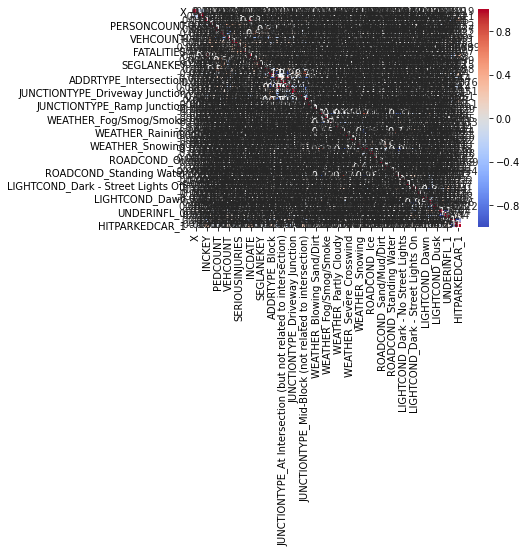

In [85]:
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.savefig('corr.png')


In [86]:
#Logistic Regression
#Fitting and Predictions
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,Y_train)
lr_predictions = lr.predict(X_test)
print(lr_predictions,'\n')

#Confusion Matrix
lr_cm = confusion_matrix(Y_test,lr_predictions)
print(lr_cm,'\n')

#Classification Report
lr_cr = classification_report(Y_test,lr_predictions)
print(lr_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,lr_predictions)
print(acc,'\n')
accDict = {}
accDict['LR'] = acc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['1' '1' '1' ... '1' '1' '1'] 

[[    0     1     0     0]
 [    0 19238     0     0]
 [    0  9855     0     0]
 [    0    51     0     0]] 



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.66      1.00      0.80     19238
           2       0.00      0.00      0.00      9855
           3       0.00      0.00      0.00        51

   micro avg       0.66      0.66      0.66     29145
   macro avg       0.17      0.25      0.20     29145
weighted avg       0.44      0.66      0.52     29145
 

0.6600789157659976 



In [53]:
#Fitting and Predictions
knn = KNeighborsClassifier()
params = {'n_neighbors':[3,4,5,6,7],
          'p':[1,2]}
knn1 = GridSearchCV(knn, param_grid=params)
knn1.fit(X_train,Y_train.values.ravel())
knn_predictions = knn1.predict(X_test)

print('Best Hyperparameter KNN : ',knn1.best_params_)

#Confusion Matrix
knn_cm = confusion_matrix(Y_test,knn_predictions)
print(knn_cm,'\n')

#Classification Report
knn_cr = classification_report(Y_test,knn_predictions)
print(knn_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,knn_predictions)
print(acc,'\n')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best Hyperparameter KNN :  {'n_neighbors': 6, 'p': 1}
[[    0     1     0     0]
 [    0 17641  1597     0]
 [    0  8801  1054     0]
 [    0    47     4     0]] 



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.92      0.77     19238
           2       0.40      0.11      0.17      9855
           3       0.00      0.00      0.00        51

   micro avg       0.64      0.64      0.64     29145
   macro avg       0.27      0.26      0.24     29145
weighted avg       0.57      0.64      0.57     29145
 

0.6414479327500429 



In [54]:
#Fitting and Predictions
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=10)
params = {'criterion':['gini', 'entropy'], 
          'random_state':[5]}
dtc1 = GridSearchCV(dtc, param_grid=params)
dtc1.fit(X_train,Y_train)
dtc_predictions = dtc1.predict(X_test)
print('Best Hyperparameter DTC : ',dtc1.best_params_)

#Confusion Matrix
dtc_cm=confusion_matrix(Y_test,dtc_predictions)
print(dtc_cm,'\n')

#Classification Report
dtc_cr = classification_report(Y_test,dtc_predictions)
print(dtc_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,dtc_predictions)
print(acc,'\n')
accDict['DTC'] = acc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best Hyperparameter DTC :  {'criterion': 'gini', 'random_state': 5}
[[    1     0     0     0]
 [    0 19238     0     0]
 [    0     0  9855     0]
 [    0     0     0    51]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00     19238
           2       1.00      1.00      1.00      9855
           3       1.00      1.00      1.00        51

   micro avg       1.00      1.00      1.00     29145
   macro avg       1.00      1.00      1.00     29145
weighted avg       1.00      1.00      1.00     29145
 

1.0 



In [55]:
#Fitting and Predictions
rf = RandomForestClassifier()
params = {'n_estimators':[50,75,100],
          'criterion':['gini', 'entropy'], 
          'random_state':[0]}
rf1 = GridSearchCV(rf, param_grid=params)
rf1.fit(X_train,Y_train)
rf_predictions = rf1.predict(X_test)
print('Best Hyperparameter RFT : ',rf1.best_params_)

#Confusion Matrix
rf_cm=confusion_matrix(Y_test,rf_predictions)
print(rf_cm,'\n')

#Classification Report
rf_cr = classification_report(Y_test,rf_predictions)
print(rf_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,rf_predictions)
print(acc,'\n')
accDict['RFT'] = acc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_validat

Best Hyperparameter RFT :  {'criterion': 'gini', 'n_estimators': 50, 'random_state': 0}
[[    0     1     0     0]
 [    0 19238     0     0]
 [    0     0  9855     0]
 [    0     0     0    51]] 



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00     19238
           2       1.00      1.00      1.00      9855
           3       1.00      1.00      1.00        51

   micro avg       1.00      1.00      1.00     29145
   macro avg       0.75      0.75      0.75     29145
weighted avg       1.00      1.00      1.00     29145
 

0.9999656887973923 



In [67]:
# Select relevant field # and drop others

# 'SERIOUSINJURIES', 'FATALITIES', 'INJURIES',
data_clean = df[['WEATHER', 'ROADCOND', 'LIGHTCOND',
                   'SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145724 entries, 0 to 199672
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   WEATHER       145724 non-null  object
 1   ROADCOND      145724 non-null  object
 2   LIGHTCOND     145724 non-null  object
 3   SEVERITYCODE  145724 non-null  object
 4   PERSONCOUNT   145724 non-null  int64 
 5   PEDCOUNT      145724 non-null  int64 
 6   PEDCYLCOUNT   145724 non-null  int64 
 7   VEHCOUNT      145724 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 15.0+ MB


In [68]:
data_clean = pd.concat([data_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1), 
           pd.get_dummies(data_clean['ROADCOND']),
           pd.get_dummies(data_clean['LIGHTCOND']),
           pd.get_dummies(data_clean['WEATHER'])], axis=1)

In [69]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [70]:
from sklearn import preprocessing
x = data_clean.drop(['SEVERITYCODE'], axis=1)
y = data_clean[['SEVERITYCODE']]
data_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x)
data_clean_scaled[0:3]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[ 0.27450319, -0.21429387, -0.19357605,  1.77710208,  0.6128713 ,
        -0.06882385, -0.01200537, -0.0143496 , -0.06584141, -0.01852653,
        -0.59787422, -0.0849466 , -0.07838983, -0.59138288, -0.0098021 ,
        -0.11667178,  0.68550028, -0.18696762, -0.01636157,  0.73387243,
        -0.05395552, -0.43142434, -0.00693097, -0.47639601, -0.01047896,
        -0.02343682, -0.06552527],
       [ 0.98843684, -0.21429387, -0.19357605,  3.64560062,  0.6128713 ,
        -0.06882385, -0.01200537, -0.0143496 , -0.06584141, -0.01852653,
        -0.59787422, -0.0849466 , -0.07838983,  1.69095189, -0.0098021 ,
        -0.11667178, -1.45878862, -0.18696762, -0.01636157,  0.73387243,
        -0.05395552, -0.43142434, -0.00693097, -0.47639601, -0.01047896,
        -0.02343682, -0.06552527],
       [ 0.27450319, -0.21429387, -0.19357605,  1.77710208,  0.6128713 ,
        -0.06882385, -0.01200537, -0.0143496 , -0.06584141, -0.01852653,
        -0.59787422, -0.0849466 , -0.07838983,  1.6909

In [71]:

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_clean_scaled, y, 
                                                    test_size=0.2, random_state=42)

In [72]:
#DECISION TREE ON SECOND SET OF DATA
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dTreeModel.fit(x_train, y_train)
dTreeModel

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
yHat = dTreeModel.predict(x_test)

In [74]:
print(classification_report(y_test, yHat))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.71      0.98      0.83     19147
           2       0.86      0.24      0.37      9945
           3       0.00      0.00      0.00        52

   micro avg       0.73      0.73      0.73     29145
   macro avg       0.39      0.31      0.30     29145
weighted avg       0.76      0.73      0.67     29145



In [75]:
#Accuracy
acc = accuracy_score(Y_test,yHat)
print(acc,'\n')
accDict['RFT'] = acc

0.6296791902556185 



In [76]:
#Logistic Regression
#Fitting and Predictions ON SECOND SET OF DATA
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
lr_predictions = lr.predict(x_test)
print(lr_predictions,'\n')

#Confusion Matrix
lr_cm = confusion_matrix(y_test,lr_predictions)
print(lr_cm,'\n')

#Classification Report
lr_cr = classification_report(y_test,lr_predictions)
print(lr_cr,'\n')

#Accuracy
acc = accuracy_score(y_test,lr_predictions)
print(acc,'\n')
accDict = {}
accDict['LR'] = acc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['1' '1' '1' ... '1' '1' '1'] 

[[    0     0     1     0]
 [    0 18598   549     0]
 [    0  7397  2548     0]
 [    0    16    36     0]] 



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.72      0.97      0.82     19147
           2       0.81      0.26      0.39      9945
           3       0.00      0.00      0.00        52

   micro avg       0.73      0.73      0.73     29145
   macro avg       0.38      0.31      0.30     29145
weighted avg       0.75      0.73      0.67     29145
 

0.7255446903413965 



In [90]:
#RANDOM CLASSIFIER ON SECOND SET OF DATA
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=75)
rfcModel.fit(x_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:

yHat = rfcModel.predict(x_test)

In [92]:
print(classification_report(y_test, yHat))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.72      0.96      0.83     19147
           2       0.79      0.28      0.42      9945
           3       0.00      0.00      0.00        52

   micro avg       0.73      0.73      0.73     29145
   macro avg       0.38      0.31      0.31     29145
weighted avg       0.74      0.73      0.69     29145



In [95]:
#Accuracy
acc = accuracy_score(yHat,y_test)
print(acc,'\n')
accDict = {}
accDict['RF1'] = acc

0.7301423914908217 



In [87]:
#KNN ON SECOND SET OF DATA

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [88]:
y_pred = classifier.predict(x_test)

In [89]:
#Accuracy
acc = accuracy_score(y_pred,y_test)
print(acc,'\n')
accDict['KNN'] = acc

0.7234517069823297 

